## Bäckerei-Umsatzdaten

Wichtige Links: <br>
- [Handbuch](https://opencampus.gitbook.io/opencampus-machine-learning-program/courses/einfuehrung)

#### Woche 3 - Versionierung mit git & Datenaufbereitung
Aufgaben:
- Die Dateien umsatzdaten_gekuerzt.csv, kiwo.csv und wetter.csv und in einem Pandas Dataframe zusammenführen.
- Euch im Team treffen und aufteilen, wer für welche Variablen deskriptive Statistiken und Visualisierungen erstellt.
- Deskriptive Statistiken und Visualisierungen zu den jeweiligen Variablen erstellen.


In [5]:
#Einlesen der umsatzdaten_gekuerzt.csv Datei
import pandas as pd
umsatz_csv_url = 'https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/refs/heads/main/umsatzdaten_gekuerzt.csv'
df_umsatzdaten = pd.read_csv(umsatz_csv_url)

#Einlesen von kiwo.csv
kiwo_csv_url = 'https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/refs/heads/main/kiwo.csv'
df_kiwo = pd.read_csv(kiwo_csv_url)

#Einlesen von wetter.csv
wetter_csv_url = 'https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/refs/heads/main/wetter.csv'
df_wetter = pd.read_csv(wetter_csv_url)

print(df_umsatzdaten.head())
print(df_umsatzdaten.shape)
print(df_kiwo.head())
print(df_kiwo.shape)
print(df_wetter.head())
print(df_wetter.shape)

        Datum  Warengruppe      Umsatz
0  2013-07-01            1  148.828353
1  2013-07-02            1  159.793757
2  2013-07-03            1  111.885594
3  2013-07-04            1  168.864941
4  2013-07-05            1  171.280754
(9334, 3)
        Datum  KielerWoche
0  2012-06-16            1
1  2012-06-17            1
2  2012-06-18            1
3  2012-06-19            1
4  2012-06-20            1
(72, 2)
        Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode
0  2012-01-01         8.0      9.8250                   14        58.0
1  2012-01-02         7.0      7.4375                   12         NaN
2  2012-01-03         8.0      5.5375                   18        63.0
3  2012-01-04         4.0      5.6875                   19        80.0
4  2012-01-05         6.0      5.3000                   23        80.0
(2601, 5)


In [6]:
#Zusammenführung der Dataframes

df_umsatz_kiwo_wetter = df_umsatzdaten.merge(df_kiwo, on='Datum', how='left') \
                            .merge(df_wetter, on='Datum', how='left')

#Problem: Nur übereinstimmende Werte für 'Datum' werden im zusammengeführten Dataframe angezeigt

print(df_umsatz_kiwo_wetter.head())
print(df_umsatz_kiwo_wetter.shape) 

        Datum  Warengruppe      Umsatz  KielerWoche  Bewoelkung  Temperatur  \
0  2013-07-01            1  148.828353          NaN         6.0     17.8375   
1  2013-07-02            1  159.793757          NaN         3.0     17.3125   
2  2013-07-03            1  111.885594          NaN         7.0     21.0750   
3  2013-07-04            1  168.864941          NaN         7.0     18.8500   
4  2013-07-05            1  171.280754          NaN         5.0     19.9750   

   Windgeschwindigkeit  Wettercode  
0                 15.0        20.0  
1                 10.0         NaN  
2                  6.0        61.0  
3                  7.0        20.0  
4                 12.0         NaN  
(9334, 8)


            Umsatz_mean  Umsatz_std
Bewoelkung                         
0.0         1121.525843  273.473206
4.0         1431.575457  495.701947
5.0         1094.018270  250.699213
6.0         1061.305068  207.825906
8.0         1152.438868  156.520301
10.0        1104.442741  241.660694
12.0        1109.397148  289.850275
15.0        1182.150521  272.191792
16.0        1855.501517  715.290710
18.0        1085.230357  237.619409
20.0        1126.403334  285.140864
24.0        1109.736281  557.808386
25.0        1093.391270  266.366813
28.0         993.893071  211.479518
30.0        1060.559325  295.042970
35.0        1033.861790  298.913509
36.0         947.367927  216.968356
40.0         956.560651  295.108427
42.0         867.489406  176.334854
48.0         903.576534  206.071465


<BarContainer object of 20 artists>

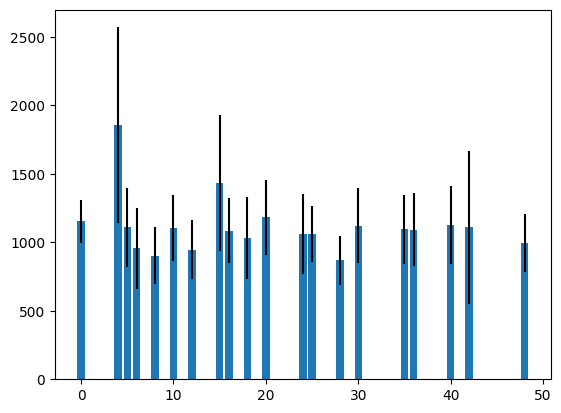

In [30]:
import matplotlib.pyplot as plt
import numpy as np
df_umsatz_kiwo_wetter2=df_umsatz_kiwo_wetter.groupby('Datum').sum('Umsatz')
Wolke=df_umsatz_kiwo_wetter2.groupby('Bewoelkung').agg(Umsatz_mean=('Umsatz','mean'),Umsatz_std=('Umsatz','std'))
bewoelkung_values = df_umsatz_kiwo_wetter2['Bewoelkung'].unique()
print(Wolke)
plt.bar(bewoelkung_values, Wolke['Umsatz_mean'],yerr=Wolke['Umsatz_std'])

In [8]:
# Nina war hier